In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('bilet.csv')

In [3]:
data

,sıra,fiyat
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


In [4]:
x = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values.reshape(-1, 1)

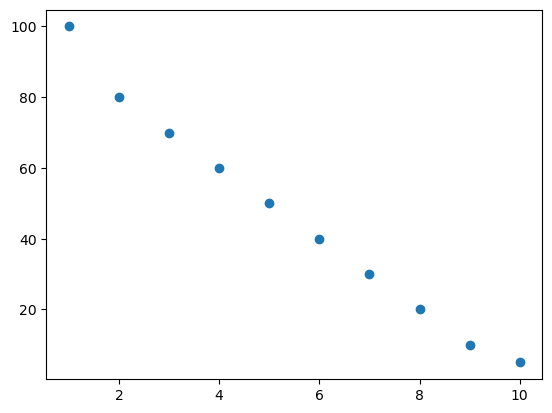

In [5]:
plt.scatter(x, y)

In [6]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()

In [7]:
dc.fit(x, y)

DecisionTreeRegressor()

In [8]:
dc.predict([[1]])

array([100.])

In [9]:
yhead = dc.predict(x)   # we are predicting y values with x values / y değerlerini x değerleri ile tahmin ediyoruz

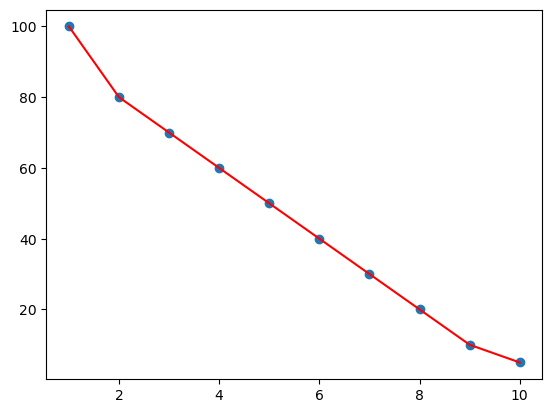

In [10]:
plt.scatter(x, y)
plt.plot(x, yhead, color = "red")   

In [11]:
x1 = np.arange(min(x), max(x), 0.1).reshape(-1, 1)

In [12]:
yhead1 = dc.predict(x1)

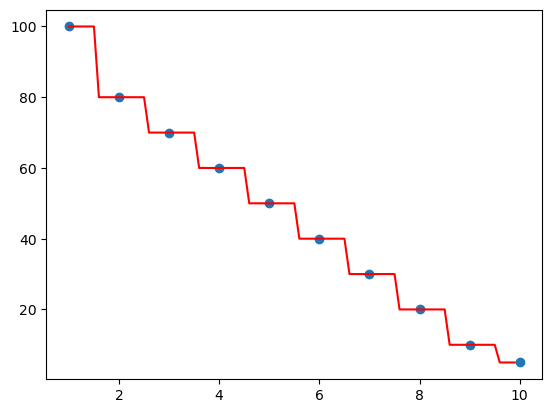

In [13]:
plt.scatter(x, y)
plt.plot(x1, yhead1, color = "red")   # we are predicting y values with x values / y değerlerini x değerleri ile tahmin ediyoruz

In [14]:
from sklearn.metrics import r2_score,mean_squared_error

y_true = y
y_pred = yhead

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE : ", rmse)

#R-Squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
r2 = r2_score(y_true, y_pred)   
print("R2 : ", r2)



RMSE :  0.0
R2 :  1.0


In [ ]:
# Overfitting oratya çıktı. Çünkü R2 değeri 1.

RMSE: 0.6757112625914389
R^2: 0.6515700686011479


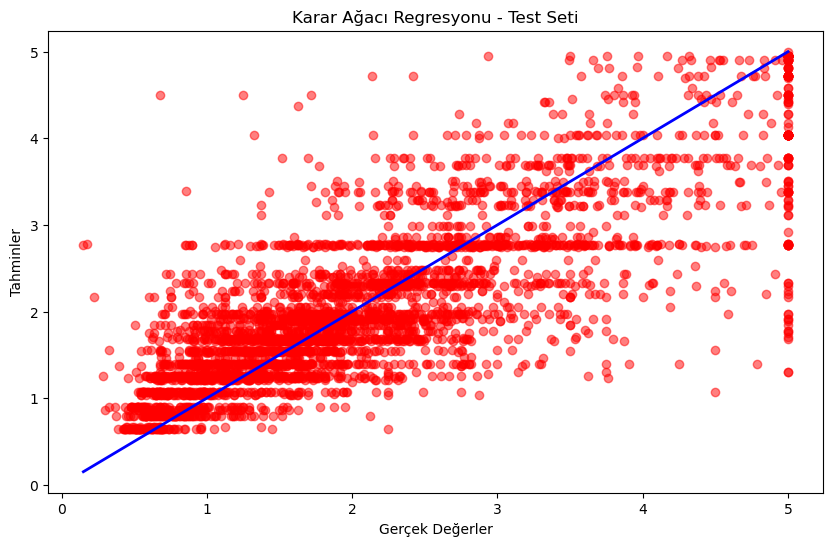

In [15]:
# Gerekli kütüphaneleri içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# California Housing veri setini yükle
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data
y = california_housing.target

# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar Ağacı Regresyon modelini oluştur ve eğit
regressor = DecisionTreeRegressor(max_depth=7)
regressor.fit(X_train, y_train)

# Test veri seti üzerinde tahminler yap
y_pred = regressor.predict(X_test)

# Performans metriklerini hesapla
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdır
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Gerçek ve tahmin edilen değerleri görselleştir
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linewidth=2)
plt.title('Karar Ağacı Regresyonu - Test Seti')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.show()


In [16]:
print(california_housing.data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [17]:
# Manuel olarak girilen özellik değerleri
input_features = [8.3252, 41, 6.984127, 1.023810, 322, 2.555556, 37.88, -122.23]

# Sütun isimlerini kullanarak bir DataFrame oluştur
input_df = pd.DataFrame([input_features], columns=california_housing.feature_names)

# Tahmini yap
predicted_price = regressor.predict(input_df)

# Tahmin edilen ev fiyatını yazdır
print(f"Tahmin edilen ev fiyatı: {predicted_price[0]}")


Tahmin edilen ev fiyatı: 4.906149647058816
